# Applied Machine Learning-KAIST
## By: Gautam Phuyal
## Id: 19937PG

Sarcopenia, the age-related decline in skeletal muscle mass and function, poses significant health risks including increased falls, fractures, and even premature mortality. Factors like aging, smoking, physical inactivity, poor nutrition, and chronic diseases such as hypertension, diabetes, and obesity exacerbate muscle deterioration. Understanding the intricate relationships between muscle loss, functional decline, and these risk factors is crucial for early detection and effective prevention strategies to mitigate sarcopenia-related health outcomes in the elderly.

In [57]:

# Imorting libraries
import pandas as pd
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
import re
from sklearn.preprocessing import LabelEncoder
import numpy as np
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from joblib import dump
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV


## Loading Dataset

In [58]:
file_path = 'DataSampled.csv'
data = pd.read_csv(file_path)

## Initial Data Examination:

In [59]:
# Display basic information about the dataset
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 39 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   MMSE                    812 non-null    float64
 1   Age                     1303 non-null   int64  
 2   Weight                  1302 non-null   float64
 3   Height                  1301 non-null   float64
 4   Waist                   1297 non-null   float64
 5   Hip                     1296 non-null   float64
 6   Smoking                 1302 non-null   float64
 7    Smoking (packet/year)  1301 non-null   object 
 8     Alcohol               1303 non-null   object 
 9   DM                      1303 non-null   int64  
 10  DM duration             1289 non-null   float64
 11  İnsülin                 1297 non-null   float64
 12   DM drug                379 non-null    object 
 13  Hiperlipidemi           1301 non-null   float64
 14  Dyslipidemia duration   1287 non-null   

In [60]:
data.shape

(1303, 39)

In [61]:

data.describe()

,MMSE,Age,Weight,Height,Waist,Hip,Smoking,DM,DM duration,İnsülin,...,HT,HT duration,LowCST,CST,Gait speed,Low grip strength,Grip strength,SARCOPENIA,STAR,BMI
count,812.000000,1303.000000,1302.000000,1301.000000,1297.000000,1296.000000,1302.000000,1303.000000,1289.000000,1297.000000,...,1303.000000,1261.000000,1113.000000,1303.000000,1300.000000,1166.000000,1303.000000,1302.000000,1295.000000,1301.000000
mean,27.519704,61.348427,76.849693,160.322513,99.747880,109.384645,0.321813,0.303147,2.850202,0.060910,...,0.634689,5.778699,0.318059,11.236761,0.988775,0.220412,26.947045,0.188940,1.226873,30.033651
std,2.767765,9.724303,13.701356,10.022912,12.568456,11.819345,0.467351,0.459795,6.048845,0.239257,...,0.481702,7.513770,0.465932,4.449019,0.281349,0.414702,9.291133,0.391611,0.308437,5.484643
min,13.000000,44.000000,42.000000,1.590000,58.000000,15.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.100000,0.250000,0.000000,7.000000,0.000000,0.490000,15.800000
25%,27.000000,53.000000,68.000000,155.000000,92.000000,102.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,8.800000,0.780000,0.000000,20.000000,0.000000,1.005000,26.300000
50%,28.000000,61.000000,75.000000,160.000000,100.000000,108.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,2.000000,0.000000,10.500000,0.980000,0.000000,25.000000,0.000000,1.200000,29.330000
75%,30.000000,68.000000,85.000000,166.000000,108.000000,116.000000,1.000000,1.000000,2.000000,0.000000,...,1.000000,10.000000,1.000000,12.600000,1.170000,0.000000,32.000000,0.000000,1.420000,32.900000
max,30.000000,92.000000,150.000000,192.000000,152.000000,191.000000,1.000000,1.000000,40.000000,1.000000,...,1.000000,55.000000,1.000000,50.000000,2.410000,1.000000,77.000000,1.000000,2.330000,57.100000


## Handeling missing values

In [62]:
# Count of Missing Values by Column
missing_values = data.isnull().sum().sort_values(ascending=False)
print (missing_values)

Dyslipidemia drugs        1072
Other(s)                  1018
OP                         948
 DM drug                   924
Anti-HT drug type          553
MMSE                       491
LowCST                     190
Low grip strength          137
ASTIM                      123
Working Status              80
KOAH                        78
Occupation                  66
KAH duration                54
KAH                         42
HT duration                 42
Hipotiroidi                 32
Exercise                    20
Education                   20
Dyslipidemia duration       16
DM duration                 14
STAR                         8
Hip                          7
Waist                        6
İnsülin                      6
Gait speed                   3
 Smoking (packet/year)       2
Hiperlipidemi                2
BMI                          2
Height                       2
SARCOPENIA                   1
Weight                       1
Smoking                      1
Grip str

In [63]:
# Remove leading and trailing spaces from column names
data.columns = data.columns.str.strip()

# Reprint column names to confirm correction
data.columns

Index(['MMSE', 'Age', 'Weight', 'Height', 'Waist', 'Hip', 'Smoking',
       'Smoking (packet/year)', 'Alcohol', 'DM', 'DM duration', 'İnsülin',
       'DM drug', 'Hiperlipidemi', 'Dyslipidemia duration',
       'Dyslipidemia drugs', 'KAH', 'KAH duration', 'Hipotiroidi', 'ASTIM',
       'KOAH', 'OP', 'Other(s)', 'HT', 'Anti-HT drug type', 'HT duration',
       'Education', 'Occupation', 'Working Status', 'Exercise', 'LowCST',
       'CST', 'Gait speed', 'Low grip strength', 'Grip strength', 'SARCOPENIA',
       'STAR', 'BMI', 'Gender'],
      dtype='object')

In [64]:
# Correcting Height: Convert heights from meters to centimeters if misrecorded
data['Height'] = data['Height'].apply(lambda x: x*100 if x < 3 else x)


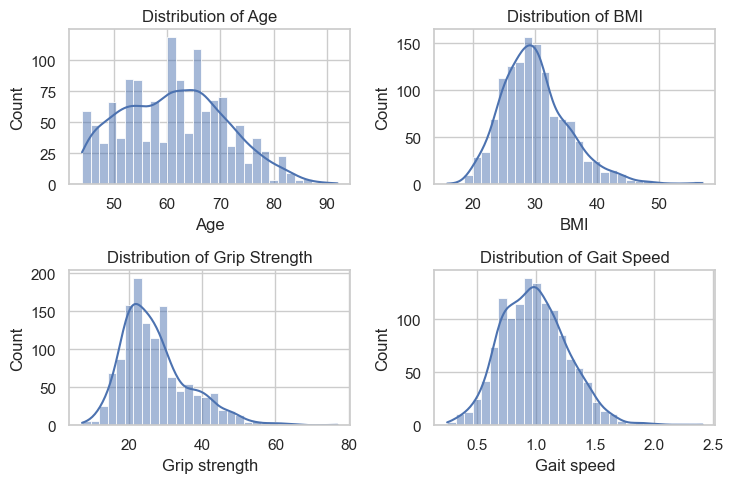

In [65]:

# Setting the aesthetic style of the plots
sns.set(style="whitegrid")

# Creating a figure to contain the subplots
fig, axes = plt.subplots(2, 2, figsize=(7.5, 5))

# Plotting histograms for Age, BMI, Grip Strength, and Gait Speed
sns.histplot(data['Age'], bins=30, kde=True, ax=axes[0, 0])
axes[0, 0].set_title('Distribution of Age')

sns.histplot(data['BMI'], bins=30, kde=True, ax=axes[0, 1])
axes[0, 1].set_title('Distribution of BMI')

sns.histplot(data['Grip strength'], bins=30, kde=True, ax=axes[1, 0])
axes[1, 0].set_title('Distribution of Grip Strength')

sns.histplot(data['Gait speed'], bins=30, kde=True, ax=axes[1, 1])
axes[1, 1].set_title('Distribution of Gait Speed')

plt.tight_layout()
plt.show()

Age: Appears to be normally distributed with a slight right skew, indicating a larger proportion of older individuals in the dataset.
BMI: Shows a roughly normal distribution with a slight right skew as well, suggesting that there are more individuals with a higher BMI.
Grip Strength: Appears normally distributed, this variable is likely a significant factor in the diagnosis of sarcopenia, given its relevance to muscle strength.
Gait Speed: Also roughly normal but with a peak slightly to the right, indicating variability in mobility among individuals.


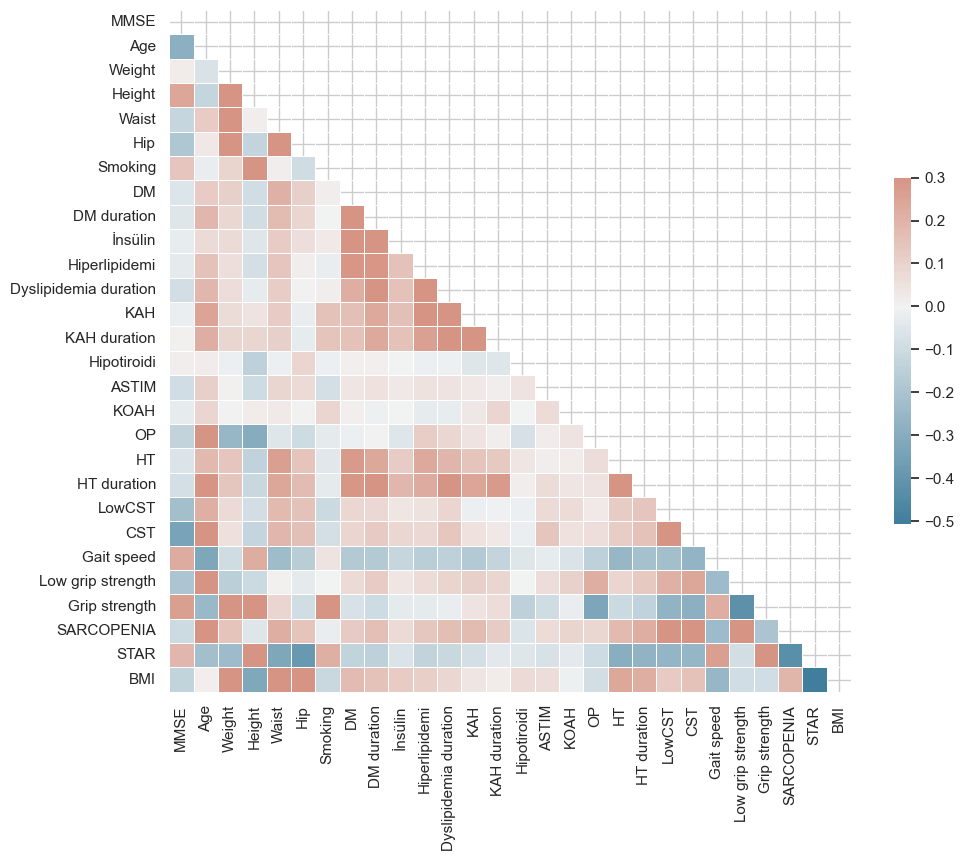

In [66]:
# Ensure that only numeric columns are being considered for the correlation matrix
numeric_data = data.select_dtypes(include=[np.number])

# Calculate the correlation matrix
correlation_matrix = numeric_data.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(correlation_matrix, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

plt.show()


### Heatmap Analysis

- **Color Scale**: The color scale on the right side of the heatmap indicates the correlation coefficient range, which varies from -1 to +1.
  - `+1`: Indicates a perfect positive linear relationship.
  - `0`: Indicates no linear relationship.
  - `-1`: Indicates a perfect negative linear relationship.

- **Color Intensity**:
  - **Darker red**: Indicates a stronger positive correlation.
  - **Darker blue**: Indicates a stronger negative correlation.
  - **Lighter colors or white**: Indicate a weaker or no correlation.

- **Cells**:
  - Each cell in the heatmap corresponds to the correlation between a pair of variables.
  - For example, the intersection of the `Age` row and `SARCOPENIA` column shows the correlation between age and the presence of sarcopenia.
  - Cells along the diagonal are always the darkest red because they represent the correlation of a variable with itself (correlation coefficient of +1).

- **Symmetry**:
  - The matrix is symmetrical about the diagonal since the correlation between variable A and variable B is the same as the correlation between variable B and variable A.

#### Analysis:

- **Variables with stronger red cells** in the `SARCOPENIA` row/column are positively correlated with sarcopenia, meaning as these variable values increase, the likelihood of sarcopenia also increases.
  
- **Variables with stronger blue cells** in the `SARCOPENIA` row/column are negatively correlated with sarcopenia, meaning as these variable values increase, the likelihood of sarcopenia decreases.

- **Variables with weaker or white cells** in the `SARCOPENIA` row/column have little to no linear relationship with sarcopenia.

#### Use in Modeling:

- Variables with strong correlations may be good predictors in a model for sarcopenia. However, it's important to consider other factors beyond just correlation when building a model, such as causation, data quality, and the interpretability of the model.


In [67]:
# First, let's check the percentage of missing values for each feature
missing_percentage = (data.isnull().sum() / len(data)) * 100

# Display columns with missing values and the corresponding percentage of total missing
missing_percentage = missing_percentage[missing_percentage > 0].sort_values(ascending=False)
missing_percentage


Dyslipidemia drugs       82.271681
Other(s)                 78.127398
OP                       72.755180
DM drug                  70.913277
Anti-HT drug type        42.440522
MMSE                     37.682272
LowCST                   14.581734
Low grip strength        10.514198
ASTIM                     9.439754
Working Status            6.139678
KOAH                      5.986186
Occupation                5.065234
KAH duration              4.144282
KAH                       3.223331
HT duration               3.223331
Hipotiroidi               2.455871
Exercise                  1.534919
Education                 1.534919
Dyslipidemia duration     1.227936
DM duration               1.074444
STAR                      0.613968
Hip                       0.537222
Waist                     0.460476
İnsülin                   0.460476
Gait speed                0.230238
Hiperlipidemi             0.153492
Smoking (packet/year)     0.153492
Height                    0.153492
BMI                 

### Droping columns with high missing values (over 50%)

#### Dropping High Missing Value Columns

- We will identify and remove columns that have more than 50% missing values.
- This is done to ensure that the dataset we use for analysis and modeling is robust and not overly reliant on imputed values, which could introduce bias.


In [68]:
# List of columns to drop
columns_to_drop = ['Dyslipidemia drugs', 'Other(s)', 'OP', 'DM drug']

# Drop the columns from the dataframe
data.drop(columns=columns_to_drop, inplace=True)


### Imputing missing values for other columns

In [69]:
# Numerical imputer
num_imputer = SimpleImputer(strategy='median')
# Impute missing values in numerical columns
numerical_cols = data.select_dtypes(include=['int64', 'float64']).columns
data[numerical_cols] = num_imputer.fit_transform(data[numerical_cols])

# Categorical imputer
cat_imputer = SimpleImputer(strategy='most_frequent')
# Impute missing values in categorical columns
categorical_cols = data.select_dtypes(include=['object']).columns
data[categorical_cols] = cat_imputer.fit_transform(data[categorical_cols])


### Checking for missing values


In [70]:
# Check for missing values
print(data.isnull().sum())


MMSE                     0
Age                      0
Weight                   0
Height                   0
Waist                    0
Hip                      0
Smoking                  0
Smoking (packet/year)    0
Alcohol                  0
DM                       0
DM duration              0
İnsülin                  0
Hiperlipidemi            0
Dyslipidemia duration    0
KAH                      0
KAH duration             0
Hipotiroidi              0
ASTIM                    0
KOAH                     0
HT                       0
Anti-HT drug type        0
HT duration              0
Education                0
Occupation               0
Working Status           0
Exercise                 0
LowCST                   0
CST                      0
Gait speed               0
Low grip strength        0
Grip strength            0
SARCOPENIA               0
STAR                     0
BMI                      0
Gender                   0
dtype: int64


In [71]:

# Initialize OneHotEncoder
# Note: By default OneHotEncoder returns a sparse matrix. If you need a dense matrix, use toarray() or set sparse=False (if your version supports it)
onehot_encoder = OneHotEncoder(drop='first')  # drop first to avoid dummy variable trap
categorical_cols = ['Education', 'Occupation', 'Working Status', 'Exercise']  # Replace with your actual multi-category columns

# Create a new DataFrame to hold the one-hot encoded variables
onehot_encoded_df = pd.DataFrame()

# For each categorical column
for col in categorical_cols:
    # OneHot encode the data - this returns a sparse array
    onehot_encoded = onehot_encoder.fit_transform(data[[col]])
    
    # Convert to a dense DataFrame
    col_names = [f"{col}_{category}" for category in onehot_encoder.categories_[0][1:]]  # Get new column names
    onehot_encoded_df_temp = pd.DataFrame(onehot_encoded.toarray(), columns=col_names)
    
    # Concatenate the new columns to the onehot_encoded_df DataFrame
    onehot_encoded_df = pd.concat([onehot_encoded_df, onehot_encoded_df_temp], axis=1)

# Concatenate the original data with the onehot_encoded_df DataFrame
data = pd.concat([data, onehot_encoded_df], axis=1)

# Drop the original categorical columns
data.drop(categorical_cols, axis=1, inplace=True)


## standardization using StandardScaler from `scikit-learn`

In [72]:
# Initialize the StandardScaler
scaler = StandardScaler()

# Select numerical columns (excluding binary)
numerical_cols = data.select_dtypes(include=['int64', 'float64']).columns
numerical_cols = numerical_cols.drop('SARCOPENIA')  # Exclude the target variable

# Scale the numerical features
data[numerical_cols] = scaler.fit_transform(data[numerical_cols])


In [73]:

# Define the features (X) and the target (y)
X = data.drop('SARCOPENIA', axis=1)  # all columns except the target
y = data['SARCOPENIA']  # the target column

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)




In [74]:

data['Gender'] = data['Gender'].map({'M': 0, 'F': 1})
additional_categorical_features = ['Smoking (packet/year)', 'Alcohol', 'Anti-HT drug type']

# Handle potential issues in 'Smoking (packet/year)' if it's supposed to be numeric
data['Smoking (packet/year)'] = pd.to_numeric(data['Smoking (packet/year)'], errors='coerce')

# Now let's assume all additional categorical features are indeed categorical and apply one-hot encoding
data = pd.get_dummies(data, columns=additional_categorical_features, drop_first=True)


# Confirm there are no more object type columns
print(data.select_dtypes(include=['object']).columns)


Index([], dtype='object')


##Model 1 (Basic Home-Based Features)

This model will use variables that can be obtained without the patient reporting physically to a clinic. 

In [75]:
print(data.columns.tolist())

['MMSE', 'Age', 'Weight', 'Height', 'Waist', 'Hip', 'Smoking', 'DM', 'DM duration', 'İnsülin', 'Hiperlipidemi', 'Dyslipidemia duration', 'KAH', 'KAH duration', 'Hipotiroidi', 'ASTIM', 'KOAH', 'HT', 'HT duration', 'LowCST', 'CST', 'Gait speed', 'Low grip strength', 'Grip strength', 'SARCOPENIA', 'STAR', 'BMI', 'Gender', 'Education_High school', 'Education_Illiterate', 'Education_Lise', 'Education_Primary School', 'Education_Primary school', 'Education_Secondary School', 'Education_Secondary school', 'Education_University', 'Education_high School', 'Education_high school', 'Education_highschool', 'Education_housewife', 'Education_ilkokul', 'Education_illeterate', 'Education_illiterate', 'Education_lise', 'Education_middle school', 'Education_none', 'Education_okur-yzar değil', 'Education_ortaokul', 'Education_primary School', 'Education_primary school', 'Education_secondary School', 'Education_secondary school', 'Education_university', 'Education_worker ', 'Education_üniversite', 'Educat

Step 1: Splitting a data by gender

In [76]:
# Split the dataset by gender
male_data = data[data['Gender'] == 0]
female_data = data[data['Gender'] == 1]

# Define features and target for each gender-specific dataset
X_male = male_data.drop('SARCOPENIA', axis=1)
y_male = male_data['SARCOPENIA']
X_female = female_data.drop('SARCOPENIA', axis=1)
y_female = female_data['SARCOPENIA']

# Split each gender-specific dataset into training and testing sets
X_train_male, X_test_male, y_train_male, y_test_male = train_test_split(
    X_male, y_male, test_size=0.2, random_state=42, stratify=y_male)
X_train_female, X_test_female, y_train_female, y_test_female = train_test_split(
    X_female, y_female, test_size=0.2, random_state=42, stratify=y_female)


In [77]:

# Initialize and train the logistic regression model for each gender
logreg_male = LogisticRegression()
logreg_female = LogisticRegression()

logreg_male.fit(X_train_male, y_train_male)
logreg_female.fit(X_train_female, y_train_female)


LogisticRegression()

In [78]:
# Initialize and train the random forest model for each gender
rf_male = RandomForestClassifier(random_state=42)
rf_female = RandomForestClassifier(random_state=42)

rf_male.fit(X_train_male, y_train_male)
rf_female.fit(X_train_female, y_train_female)


RandomForestClassifier(random_state=42)

In [79]:
# Initialize and train the gradient boosting model for each gender
gb_male = GradientBoostingClassifier(random_state=42)
gb_female = GradientBoostingClassifier(random_state=42)

gb_male.fit(X_train_male, y_train_male)
gb_female.fit(X_train_female, y_train_female)


GradientBoostingClassifier(random_state=42)

In [80]:
# Evaluate the models for male dataset
predictions_male_logreg = logreg_male.predict(X_test_male)
predictions_male_rf = rf_male.predict(X_test_male)
predictions_male_gb = gb_male.predict(X_test_male)

print("Logistic Regression - Male:", classification_report(y_test_male, predictions_male_logreg))
print("Random Forest - Male:", classification_report(y_test_male, predictions_male_rf))
print("Gradient Boosting - Male:", classification_report(y_test_male, predictions_male_gb))

# Evaluate the models for female dataset
predictions_female_logreg = logreg_female.predict(X_test_female)
predictions_female_rf = rf_female.predict(X_test_female)
predictions_female_gb = gb_female.predict(X_test_female)

print("Logistic Regression - Female:", classification_report(y_test_female, predictions_female_logreg))
print("Random Forest - Female:", classification_report(y_test_female, predictions_female_rf))
print("Gradient Boosting - Female:", classification_report(y_test_female, predictions_female_gb))


Logistic Regression - Male:               precision    recall  f1-score   support

         0.0       0.90      0.95      0.92        57
         1.0       0.81      0.68      0.74        19

    accuracy                           0.88        76
   macro avg       0.86      0.82      0.83        76
weighted avg       0.88      0.88      0.88        76

Random Forest - Male:               precision    recall  f1-score   support

         0.0       0.86      0.95      0.90        57
         1.0       0.77      0.53      0.62        19

    accuracy                           0.84        76
   macro avg       0.81      0.74      0.76        76
weighted avg       0.84      0.84      0.83        76

Gradient Boosting - Male:               precision    recall  f1-score   support

         0.0       1.00      0.98      0.99        57
         1.0       0.95      1.00      0.97        19

    accuracy                           0.99        76
   macro avg       0.97      0.99      0.98        7

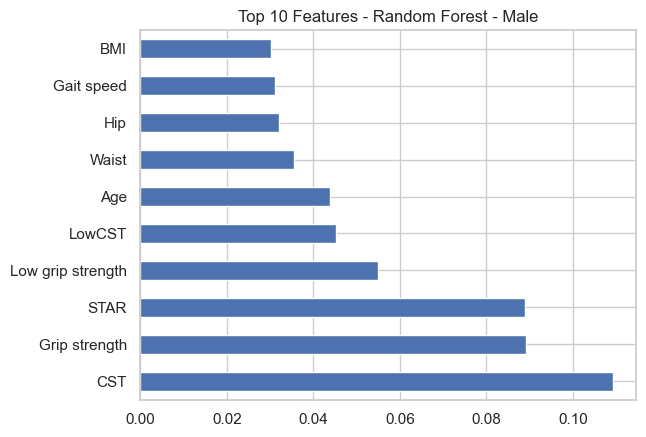

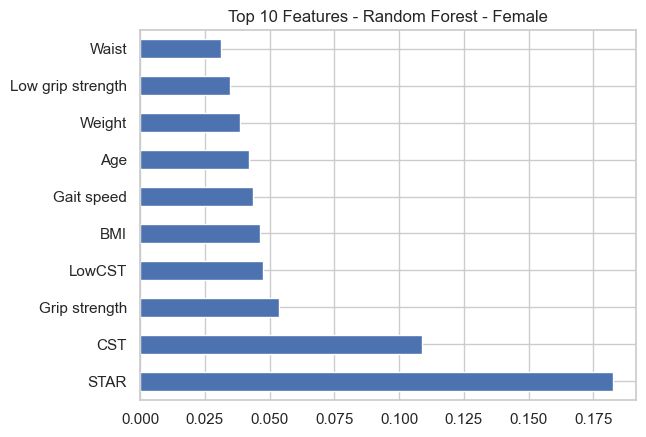

In [81]:
# Feature importance from the random forest model for males
feature_importances_male_rf = pd.Series(rf_male.feature_importances_, index=X_train_male.columns)
feature_importances_male_rf.nlargest(10).plot(kind='barh')
plt.title('Top 10 Features - Random Forest - Male')
plt.show()

# Feature importance from the random forest model for males
feature_importances_female_rf = pd.Series(rf_female.feature_importances_, index=X_train_female.columns)
feature_importances_female_rf.nlargest(10).plot(kind='barh')
plt.title('Top 10 Features - Random Forest - Female')
plt.show()


In [82]:
# Save the Logistic Regression models
dump(logreg_male, 'model1_logistic_regression_male.joblib')
dump(logreg_female, 'model1_logistic_regression_female.joblib')

# Save the Random Forest models
dump(rf_male, 'model1_random_forest_male.joblib')
dump(rf_female, 'model1_random_forest_female.joblib')

# Save the Gradient Boosting models
dump(gb_male, 'model1_gradient_boosting_male.joblib')
dump(gb_female, 'model1_gradient_boosting_female.joblib')


['model1_gradient_boosting_female.joblib']

## Model 2

In [83]:
scaler = StandardScaler()
# Include all numeric features you plan to use in the model.
numeric_features = ['MMSE', 'Age', 'Weight', 'Height', 'Waist', 'Hip']
data[numeric_features] = scaler.fit_transform(data[numeric_features])


In [84]:
male_data = data[data['Gender'] == 0]
female_data = data[data['Gender'] == 1]

X_male = male_data.drop(['SARCOPENIA', 'Gender'], axis=1)  # Assume SARCOPENIA is the target
y_male = male_data['SARCOPENIA']

X_female = female_data.drop(['SARCOPENIA', 'Gender'], axis=1)
y_female = female_data['SARCOPENIA']


In [85]:
X_train_male, X_test_male, y_train_male, y_test_male = train_test_split(X_male, y_male, test_size=0.20, random_state=42, stratify=y_male)
X_train_female, X_test_female, y_train_female, y_test_female = train_test_split(X_female, y_female, test_size=0.20, random_state=42, stratify=y_female)

In [86]:
logreg_male = GridSearchCV(LogisticRegression(), {'C': [0.1, 1, 10], 'penalty': ['l2'], 'solver': ['liblinear']}, cv=3, scoring='roc_auc')
logreg_female = GridSearchCV(LogisticRegression(), {'C': [0.1, 1, 10], 'penalty': ['l2'], 'solver': ['liblinear']}, cv=3, scoring='roc_auc')

logreg_male.fit(X_train_male, y_train_male)
logreg_female.fit(X_train_female, y_train_female)


GridSearchCV(cv=3, estimator=LogisticRegression(),
             param_grid={'C': [0.1, 1, 10], 'penalty': ['l2'],
                         'solver': ['liblinear']},
             scoring='roc_auc')

In [87]:
rf_params = {
    'n_estimators': [50],
    'max_depth': [5],
    'min_samples_leaf': [5]
}
rf_male = GridSearchCV(RandomForestClassifier(random_state=42), rf_params, cv=3, scoring='roc_auc')
rf_female = GridSearchCV(RandomForestClassifier(random_state=42), rf_params, cv=3, scoring='roc_auc')

rf_male.fit(X_train_male, y_train_male)
rf_female.fit(X_train_female, y_train_female)


GridSearchCV(cv=3, estimator=RandomForestClassifier(random_state=42),
             param_grid={'max_depth': [5], 'min_samples_leaf': [5],
                         'n_estimators': [50]},
             scoring='roc_auc')

In [88]:
gb_params = {
    'n_estimators': [50],
    'learning_rate': [0.1],
    'max_depth': [3]
}
gb_male = GridSearchCV(GradientBoostingClassifier(random_state=42), gb_params, cv=3, scoring='roc_auc')
gb_female = GridSearchCV(GradientBoostingClassifier(random_state=42), gb_params, cv=3, scoring='roc_auc')

gb_male.fit(X_train_male, y_train_male)
gb_female.fit(X_train_female, y_train_female)


GridSearchCV(cv=3, estimator=GradientBoostingClassifier(random_state=42),
             param_grid={'learning_rate': [0.1], 'max_depth': [3],
                         'n_estimators': [50]},
             scoring='roc_auc')

In [89]:
# Male Models Evaluation
print("Male Logistic Regression ROC-AUC:", roc_auc_score(y_test_male, logreg_male.predict_proba(X_test_male)[:, 1]))
print("Male Random Forest ROC-AUC:", roc_auc_score(y_test_male, rf_male.predict_proba(X_test_male)[:, 1]))
print("Male Gradient Boosting ROC-AUC:", roc_auc_score(y_test_male, gb_male.predict_proba(X_test_male)[:, 1]))

# Female Models Evaluation
print("Female Logistic Regression ROC-AUC:", roc_auc_score(y_test_female, logreg_female.predict_proba(X_test_female)[:, 1]))
print("Female Random Forest ROC-AUC:", roc_auc_score(y_test_female, rf_female.predict_proba(X_test_female)[:, 1]))
print("Female Gradient Boosting ROC-AUC:", roc_auc_score(y_test_female, gb_female.predict_proba(X_test_female)[:, 1]))


Male Logistic Regression ROC-AUC: 0.9187442289935364
Male Random Forest ROC-AUC: 0.8919667590027701
Male Gradient Boosting ROC-AUC: 0.984302862419206
Female Logistic Regression ROC-AUC: 0.8809865900383141
Female Random Forest ROC-AUC: 0.9868295019157087
Female Gradient Boosting ROC-AUC: 0.9997605363984674


In [90]:

dump(logreg_male.best_estimator_, 'model2_logreg_male.joblib')
dump(logreg_female.best_estimator_, 'model2_logreg_female.joblib')
dump(rf_male.best_estimator_, 'model2_rf_male.joblib')
dump(rf_female.best_estimator_, 'model2_rf_female.joblib')
dump(gb_male.best_estimator_, 'model2_gb_male.joblib')
dump(gb_female.best_estimator_, 'model2_gb_female.joblib')


['model2_gb_female.joblib']

# Model 3

### Data Preparation

In [91]:
# Convert 'Gender' to string type before calling string methods
data['Gender'] = data['Gender'].astype(str).str.upper().str.strip()

male_data = data[data['Gender'] == 0]
female_data = data[data['Gender'] == 1]
# Check the unique values of 'Gender' after standardization
print(data['Gender'].unique())

# Check the unique values of 'Gender' after standardization
print(data['Gender'].unique())

# Split the data by gender
X_male = X[data['Gender'] == 0]
y_male = y[data['Gender'] == 0]

X_female = X[data['Gender'] == 1]
y_female = y[data['Gender'] == 1]


['1.0' '0.0' 'NAN']
['1.0' '0.0' 'NAN']


In [92]:
logreg_params = {'C': [0.01, 0.1, 1, 10], 'solver': ['liblinear']}
rf_params = {'n_estimators': [100, 200], 'max_depth': [5, 10, None], 'min_samples_leaf': [1, 2]}
gb_params = {'n_estimators': [100, 200], 'learning_rate': [0.01, 0.1], 'max_depth': [3, 5]}

# Initialize the GridSearchCV objects for each model and gender
logreg_male_gs = GridSearchCV(LogisticRegression(), logreg_params, cv=5, scoring='roc_auc')
logreg_female_gs = GridSearchCV(LogisticRegression(), logreg_params, cv=5, scoring='roc_auc')

rf_male_gs = GridSearchCV(RandomForestClassifier(random_state=42), rf_params, cv=5, scoring='roc_auc')
rf_female_gs = GridSearchCV(RandomForestClassifier(random_state=42), rf_params, cv=5, scoring='roc_auc')

gb_male_gs = GridSearchCV(GradientBoostingClassifier(random_state=42), gb_params, cv=5, scoring='roc_auc')
gb_female_gs = GridSearchCV(GradientBoostingClassifier(random_state=42), gb_params, cv=5, scoring='roc_auc')


In [93]:
# Explicitly convert the 'Smoking' column to string to handle any non-string entries
data['Smoking'] = data['Smoking'].astype(str)

# Now apply the .str accessor
data['Smoking'] = data['Smoking'].str.extract('(\d+)')  # Extracts numeric part

# Convert extracted string numbers to float
data['Smoking'] = data['Smoking'].astype(float)


In [94]:
median_smoking = data['Smoking'].median()
data['Smoking'].fillna(median_smoking, inplace=True)  # Fill NaNs resulted from extraction


/var/folders/72/rbkg46ms4w34b7kqvl3yskw80000gn/T/ipykernel_6471/2261216053.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Smoking'].fillna(median_smoking, inplace=True)  # Fill NaNs resulted from extraction


In [95]:
# Make sure 'Smoking' column is treated as a string
data['Smoking'] = data['Smoking'].astype(str)

# Check the output to confirm no errors
print(data['Smoking'].head())
# Extract numeric part and handle potential non-matches
data['Smoking_Numeric'] = pd.to_numeric(data['Smoking'].str.extract('(\d+)')[0], errors='coerce')

# Extract text part and handle potential non-matches
data['Smoking_Status'] = data['Smoking'].str.extract('([a-zA-Z]+)')[0].str.lower()

# Fill NaN in 'Smoking_Status' and 'Smoking_Numeric' after extraction
data['Smoking_Status'].fillna('unknown', inplace=True)
data['Smoking_Numeric'].fillna(0, inplace=True)  # Assuming 0 for missing numeric part, adjust as necessary

# Check the output to confirm transformations
print(data[['Smoking_Numeric', 'Smoking_Status']].head())
# Map statuses to standardized categories
status_mapping = {
    'exsmoker': 'ex-smoker',
    'smoker': 'smoker',
    'nonsmoker': 'non-smoker',
    'unknown': 'non-smoker'  # handling previously filled 'unknown'
}
data['Smoking_Status'] = data['Smoking_Status'].map(status_mapping)

# Convert statuses to numeric codes
encoder = LabelEncoder()
data['Smoking_Status_Coded'] = encoder.fit_transform(data['Smoking_Status'])

# Check final output
print(data[['Smoking_Numeric', 'Smoking_Status', 'Smoking_Status_Coded']].describe(include='all'))



0    0.0
1    0.0
2    0.0
3    0.0
4    1.0
Name: Smoking, dtype: object
   Smoking_Numeric Smoking_Status
0                0        unknown
1                0        unknown
2                0        unknown
3                0        unknown
4                1        unknown
        Smoking_Numeric Smoking_Status  Smoking_Status_Coded
count       1303.000000           1303                1303.0
unique              NaN              1                   NaN
top                 NaN     non-smoker                   NaN
freq                NaN           1303                   NaN
mean           0.321566            NaN                   0.0
std            0.467257            NaN                   0.0
min            0.000000            NaN                   0.0
25%            0.000000            NaN                   0.0
50%            0.000000            NaN                   0.0
75%            1.000000            NaN                   0.0
max            1.000000            NaN             

/var/folders/72/rbkg46ms4w34b7kqvl3yskw80000gn/T/ipykernel_6471/3594604211.py:13: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Smoking_Status'].fillna('unknown', inplace=True)
/var/folders/72/rbkg46ms4w34b7kqvl3yskw80000gn/T/ipykernel_6471/3594604211.py:14: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting value

In [96]:
unique_smoking_values = data['Smoking'].unique()
print(unique_smoking_values)

['0.0' '1.0']


In [97]:
def extract_smoking_status(value):
    # Normalize the string
    value = value.lower()
    # Handle known patterns
    if 'ex-smoker' in value or 'exsmoker' in value:
        return 'ex-smoker'
    elif 'smoker' in value:
        return 'smoker'
    elif any(term in value for term in ['non-smoker', 'nonsmoker', 'none']):
        return 'non-smoker'
    return 'unknown'

# Apply the function to the 'Smoking' column
data['Smoking_Status'] = data['Smoking'].apply(extract_smoking_status)

# Verify the transformations
print(data['Smoking_Status'].value_counts())


Smoking_Status
unknown    1303
Name: count, dtype: int64


In [98]:
data['Smoking_Status'] = data['Smoking_Status'].fillna('unknown')


In [99]:
print(data.columns.tolist())

['MMSE', 'Age', 'Weight', 'Height', 'Waist', 'Hip', 'Smoking', 'DM', 'DM duration', 'İnsülin', 'Hiperlipidemi', 'Dyslipidemia duration', 'KAH', 'KAH duration', 'Hipotiroidi', 'ASTIM', 'KOAH', 'HT', 'HT duration', 'LowCST', 'CST', 'Gait speed', 'Low grip strength', 'Grip strength', 'SARCOPENIA', 'STAR', 'BMI', 'Gender', 'Education_High school', 'Education_Illiterate', 'Education_Lise', 'Education_Primary School', 'Education_Primary school', 'Education_Secondary School', 'Education_Secondary school', 'Education_University', 'Education_high School', 'Education_high school', 'Education_highschool', 'Education_housewife', 'Education_ilkokul', 'Education_illeterate', 'Education_illiterate', 'Education_lise', 'Education_middle school', 'Education_none', 'Education_okur-yzar değil', 'Education_ortaokul', 'Education_primary School', 'Education_primary school', 'Education_secondary School', 'Education_secondary school', 'Education_university', 'Education_worker ', 'Education_üniversite', 'Educat

In [100]:
data_male = data[data['Gender'] == 0]
data_female = data[data['Gender'] == 1]

X_male = male_data.drop(['SARCOPENIA', 'Gender'], axis=1)
y_male = male_data['SARCOPENIA']

X_female = female_data.drop(['SARCOPENIA', 'Gender'], axis=1)
y_female = female_data['SARCOPENIA']


In [101]:
import numpy as np

# Convert 'Gender' from string to float, turning 'NAN' into a true NaN value
data['Gender'] = pd.to_numeric(data['Gender'], errors='coerce')

# Optionally, you might want to drop rows where 'Gender' is NaN if they are not useful
data.dropna(subset=['Gender'], inplace=True)

# Now filter the data
data_male = data[data['Gender'] == 0.0]
data_female = data[data['Gender'] == 1.0]



In [102]:
data['Gender']
data_male = data[data['Gender'] == 0]
data_female = data[data['Gender'] == 1]

# Check the number of entries again
print("Total entries in male dataset:", data_male.shape)
print("Total entries in female dataset:", data_female.shape)

Total entries in male dataset: (379, 441)
Total entries in female dataset: (865, 441)


In [103]:
# Create an imputer object with a median filling strategy
imputer_male = SimpleImputer(strategy='median')
imputer_female = SimpleImputer(strategy='median')

features_model_3 = [
    'Age', 'Weight', 'Height', 'BMI', 'Grip strength', 'CST', 'Gait speed',
    'Smoking_Numeric'
]
# Assuming 'Gender' has been dropped or already one-hot encoded
X_male = data_male[features_model_3].drop(columns='Gender', errors='ignore')
y_male = data_male['SARCOPENIA']
X_female = data_female[features_model_3].drop(columns='Gender', errors='ignore')
y_female = data_female['SARCOPENIA']

# Impute missing values for both male and female datasets
X_male = pd.DataFrame(imputer_male.fit_transform(X_male), columns=X_male.columns)
X_female = pd.DataFrame(imputer_female.fit_transform(X_female), columns=X_female.columns)

# Initialize scalers for male and female
scaler_male = StandardScaler()
scaler_female = StandardScaler()

# Scale the features for both datasets
X_male_scaled = scaler_male.fit_transform(X_male)
X_female_scaled = scaler_female.fit_transform(X_female)

In [104]:

X_train_male, X_test_male, y_train_male, y_test_male = train_test_split(
    X_male_scaled, y_male, test_size=0.2, random_state=42, stratify=y_male
)
X_train_female, X_test_female, y_train_female, y_test_female = train_test_split(
    X_female_scaled, y_female, test_size=0.2, random_state=42, stratify=y_female
)


In [105]:
# Parameters for Logistic Regression
param_grid_lr = {'C': [0.1, 1, 10], 'solver': ['liblinear']}

# Parameters for Random Forest
param_grid_rf = {
    'n_estimators': [50, 100],  # Reduced number of trees
    'max_depth': [None, 10],    # Reduced depth options
    'min_samples_split': [5, 10]  # Simpler splitting criteria
}

# Parameters for Gradient Boosting
param_grid_gb = {
    'n_estimators': [50, 100],  # Fewer trees
    'learning_rate': [0.05, 0.1],  # Smaller range of learning rates
    'max_depth': [3, 5]  # Reduced depth options
}

In [106]:
# Male models
grid_search_lr_male = GridSearchCV(LogisticRegression(), param_grid_lr, cv=5, scoring='roc_auc')
grid_search_rf_male = GridSearchCV(RandomForestClassifier(random_state=42), param_grid_rf, cv=5, scoring='roc_auc')
grid_search_gb_male = GridSearchCV(GradientBoostingClassifier(random_state=42), param_grid_gb, cv=5, scoring='roc_auc')

# Female models
grid_search_lr_female = GridSearchCV(LogisticRegression(), param_grid_lr, cv=5, scoring='roc_auc')
grid_search_rf_female = GridSearchCV(RandomForestClassifier(random_state=42), param_grid_rf, cv=5, scoring='roc_auc')
grid_search_gb_female = GridSearchCV(GradientBoostingClassifier(random_state=42), param_grid_gb, cv=5, scoring='roc_auc')


In [107]:
# Fit male models
grid_search_lr_male.fit(X_train_male, y_train_male)
grid_search_rf_male.fit(X_train_male, y_train_male)
grid_search_gb_male.fit(X_train_male, y_train_male)

# Fit female models
grid_search_lr_female.fit(X_train_female, y_train_female)
grid_search_rf_female.fit(X_train_female, y_train_female)
grid_search_gb_female.fit(X_train_female, y_train_female)


GridSearchCV(cv=5, estimator=GradientBoostingClassifier(random_state=42),
             param_grid={'learning_rate': [0.05, 0.1], 'max_depth': [3, 5],
                         'n_estimators': [50, 100]},
             scoring='roc_auc')

In [108]:
# Best parameters and scores for male models
print("Best parameters for male LR:", grid_search_lr_male.best_params_)
print("Best parameters for male RF:", grid_search_rf_male.best_params_)
print("Best parameters for male GB:", grid_search_gb_male.best_params_)

# Best parameters and scores for female models
print("Best parameters for female LR:", grid_search_lr_female.best_params_)
print("Best parameters for female RF:", grid_search_rf_female.best_params_)
print("Best parameters for female GB:", grid_search_gb_female.best_params_)


Best parameters for male LR: {'C': 10, 'solver': 'liblinear'}
Best parameters for male RF: {'max_depth': None, 'min_samples_split': 5, 'n_estimators': 50}
Best parameters for male GB: {'learning_rate': 0.05, 'max_depth': 5, 'n_estimators': 50}
Best parameters for female LR: {'C': 0.1, 'solver': 'liblinear'}
Best parameters for female RF: {'max_depth': 10, 'min_samples_split': 10, 'n_estimators': 100}
Best parameters for female GB: {'learning_rate': 0.05, 'max_depth': 3, 'n_estimators': 100}


In [109]:
def evaluate_model(model, X_test, y_test, model_name):
    # Predict class labels for the test set
    predictions = model.predict(X_test)

    # Predict probabilities for the test set
    probabilities = model.predict_proba(X_test)[:, 1]

    # Print the classification report
    print(f"Classification Report for {model_name}:")
    print(classification_report(y_test, predictions))

    # Calculate and print the ROC-AUC score
    roc_auc = roc_auc_score(y_test, probabilities)
    print(f"ROC-AUC Score for {model_name}: {roc_auc}\n")


In [110]:
evaluate_model(grid_search_lr_male.best_estimator_, X_test_male, y_test_male, "Logistic Regression - Male")
evaluate_model(grid_search_rf_male.best_estimator_, X_test_male, y_test_male, "Random Forest - Male")
evaluate_model(grid_search_gb_male.best_estimator_, X_test_male, y_test_male, "Gradient Boosting - Male")

evaluate_model(grid_search_lr_female.best_estimator_, X_test_female, y_test_female, "Logistic Regression - Female")
evaluate_model(grid_search_rf_female.best_estimator_, X_test_female, y_test_female, "Random Forest - Female")
evaluate_model(grid_search_gb_female.best_estimator_, X_test_female, y_test_female, "Gradient Boosting - Female")


Classification Report for Logistic Regression - Male:
              precision    recall  f1-score   support

         0.0       0.88      0.91      0.90        57
         1.0       0.71      0.63      0.67        19

    accuracy                           0.84        76
   macro avg       0.79      0.77      0.78        76
weighted avg       0.84      0.84      0.84        76

ROC-AUC Score for Logistic Regression - Male: 0.9012003693444137

Classification Report for Random Forest - Male:
              precision    recall  f1-score   support

         0.0       0.94      0.89      0.92        57
         1.0       0.73      0.84      0.78        19

    accuracy                           0.88        76
   macro avg       0.84      0.87      0.85        76
weighted avg       0.89      0.88      0.88        76

ROC-AUC Score for Random Forest - Male: 0.9039704524469068

Classification Report for Gradient Boosting - Male:
              precision    recall  f1-score   support

         0.

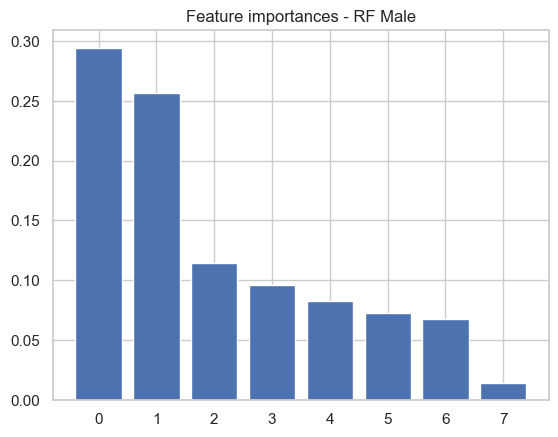

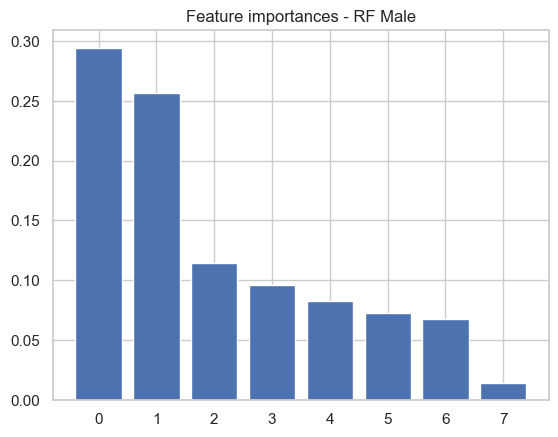

In [111]:
importances = grid_search_rf_male.best_estimator_.feature_importances_
indices = np.argsort(importances)[::-1]
plt.figure()
plt.title("Feature importances - RF Male")
plt.bar(range(X_train_male.shape[1]), importances[indices], align="center")
plt.show()
# Feature importance for Random Forest example
importances = grid_search_rf_male.best_estimator_.feature_importances_
indices = np.argsort(importances)[::-1]
plt.figure()
plt.title("Feature importances - RF Male")
plt.bar(range(X_train_female.shape[1]), importances[indices], align="center")
plt.show()



In [112]:
# Dump male models
dump(grid_search_lr_male.best_estimator_, 'model3_logreg_male.joblib')
dump(grid_search_rf_male.best_estimator_, 'model3_rf_male.joblib')
dump(grid_search_gb_male.best_estimator_, 'model3_gb_male.joblib')

# Dump female models
dump(grid_search_lr_female.best_estimator_, 'model3_logreg_female.joblib')
dump(grid_search_rf_female.best_estimator_, 'model3_rf_female.joblib')
dump(grid_search_gb_female.best_estimator_, 'model3_gb_female.joblib')


['model3_gb_female.joblib']